In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#preprocessing data
with open("./wine.data","r") as file:
    data = file.readlines()
data_pro = []
for i in data:
    data_pro.append([float(item) for item in str(i).strip().split(",")])
data_np = None
for i in data_pro:
    if data_np is None:
        data_np = np.array(i)
    else:
        data_np = np.vstack((data_np, np.array(i)))
data_np_index = np.where(data_np[:,0]!=3)[0]
data_np = data_np[data_np_index,:]
data_np[:,1:] = (data_np[:,1:] - np.mean(data_np[:,1:],axis=0))/np.std(data_np[:,1:],axis=0)
class0_index = np.where(data_np[:,0]==1)[0]
class1_index = np.where(data_np[:,0]==2)[0]
data_np[class0_index,0] = 0
data_np[class1_index,0] = 1
data_np

array([[ 0.        ,  1.452455  , -0.29441432, ..., -0.11242761,
         2.04002469,  0.782868  ],
       [ 0.        ,  0.28906609, -0.21455828, ..., -0.05291788,
         0.94143735,  0.74015178],
       [ 0.        ,  0.24388594,  0.4471061 , ..., -0.17193734,
         0.45552372,  1.12459784],
       ...,
       [ 1.        , -1.30353427,  0.18472195, ..., -0.52899571,
        -1.0867239 , -0.92293343],
       [ 1.        , -0.64842207, -0.38567837, ..., -1.00507355,
        -0.36841679, -1.27605426],
       [ 1.        , -1.02115832,  2.66025935, ..., -1.60017084,
        -0.81207706, -0.59829008]])

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def predict(x, w):
    z = np.dot(x, w)
    return sigmoid(z)

def loss_func(w,x,y):
    number = x.shape[0]
    p = predict(x,w)
    
    #Take the error when label=1
    class1_cost = y*np.log(p)
    
    #Take the error when label=0
    class0_cost = (1-y)*np.log(1-p)
    
    #Take the sum of both costs
    cost = class1_cost + class0_cost
    cost = -np.sum(cost) / number
    return cost


def pick_cordinate_random(w,x,y):
    return random.randint(0,12)

def pick_cordinate_myself(w,x,y):
    predictions = predict(x,w)
    gradient = np.dot(x.T,  predictions - y)
    return np.argmax(gradient)


def update_weights(x, y, w, cordi_index, lr):
    N = x.shape[0]
    
    #1 - Get Predictions
    predictions = predict(x,w)

    gradient = np.dot(x.T,  predictions - y)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    w[cordi_index] -= gradient[cordi_index]

    return w

def accuracy(x,w,y):
    number = x.shape[0]
    predictions = predict(x,w)
    output = (predictions>=0.5).astype(np.float)
    return np.sum((output==y).astype(np.float))/number

In [19]:
# initilization
def train(pick_function):
    y = data_np[:,0]
    y = y[:,np.newaxis]
    x = data_np[:,1:]
    w = np.random.random((13,1))
    iters = 3000
    cost_history = []
    acc_history = []
    lr = 0.1
    last_time = np.float("inf")
    print(last_time)
    for i in range(iters):
        # Calculate error for auditing purposes
        cost = loss_func(w, x, y)
        acc = accuracy(x,w,y)
        cost_history.append(cost)
        diff = last_time-cost
        last_time = cost
        print(diff)
        if (cost<0.0001):
            print("============================hhahaha",i)
        acc_history.append(acc)
    
        # geenrate cordinate
        cordi_index  = pick_function(w,x,y)
    
        # update weights
        weights = update_weights(x, y, w, cordi_index, lr)
        
        # Log Progress
        if i % 100 == 0:
            print ("iter: "+str(i) + " cost: "+str(cost))    
    return cost_history, acc_history

In [20]:
random_loss,random_accuracy = train(pick_cordinate_random)
innovation_loss,innovation_accuracy = train(pick_cordinate_myself)

inf
inf
iter: 0 cost: 1.8943185724347984
0.00448317653612218
0.033579301859437694
0.03284399865811549
4.3628513439752936e-05
0.002465476240604003
0.022675455677741985
0.002279056907228183
0.002214143784728062
0.01038661500138427
0.000996523920694381
0.031342246374397975
0.002019876831849121
0.0103568482860672
0.01599239786429818
0.027928123168603047
0.02081469606286057
0.035631466247801
0.00944304190271783
0.0031890159807934637
0.003116579443503964
0.009089929291332899
0.008852269865972096
0.015539243364709021
0.015274340477310133
0.015007393677089587
0.0014691457723616796
0.009277020136095881
0.008415171818971334
0.019100663745352797
0.0012434939586121185
0.004944498699167799
0.018396922213714362
0.017907273581107885
0.026264868087793714
0.002451778704873675
0.0009301242049613023
0.0009019544647113076
0.023022949814219373
0.0007953308059773789
0.0007712310453706905
0.02229126526893288
0.014455854075195784
0.02165299746416882
0.0006096492202434245
0.007385582200184482
0.023462632212695

0.00011901883404868974
3.483882835705887e-05
0.00017990100730075342
0.0008098490481667775
0.0001168128859608264
0.00011256172344628612
2.321378311972988e-05
3.359641554787074e-05
0.0007977320569517166
7.374460543457806e-05
0.0002866435799086797
0.0001069073478963678
0.00011430863861133789
0.00011185262901988735
0.0001094452956891534
0.0007834609351856647
0.00042171285029868333
0.00027868186938689865
0.0007669681748977142
1.950379090084886e-05
0.0004056037322970052
6.725444992755625e-05
0.00017111826830346066
0.0007531010046203102
3.495109759363291e-05
0.0007431475903810492
0.00016751078954288512
4.91283134859688e-06
0.00038495294352172693
0.00026321659255892915
0.0002604664810255952
0.0007249568879109658
1.6311348125547243e-05
1.5870996805750215e-05
0.00036875469490693646
0.00016016014494252273
1.4916024810213147e-05
6.494950447555325e-05
4.6587008392107165e-06
0.0001066477928989007
3.9825123423431474e-05
0.0007105039509833488
8.666484827321574e-05
8.510296525698902e-05
1.5250517870296

0.0002479915103352631
0.00024597162783973614
6.828958696303289e-07
5.2798404912013375e-08
2.9752204286498385e-06
2.1976087496669572e-05
0.00010375328732865896
3.945697896637346e-05
3.849419708559787e-05
2.842680571635281e-05
4.786580146132202e-08
0.00034994076957256537
5.218921242221286e-05
1.5881617550853044e-05
6.710947347415841e-07
5.413566637399447e-06
3.890939176247332e-05
3.763338274151429e-05
2.9780541872387323e-06
0.000345249739386988
0.00034156949609516485
0.000337943577339031
3.5430037362282896e-08
5.013305728772399e-05
1.5281301833661165e-05
0.00010078305985647407
2.1210278904115754e-05
4.932269749194362e-06
5.863382215587354e-07
0.00023595717142743666
2.868997268742901e-06
2.7650046843158416e-05
2.8476059281273836e-06
0.00033182009165566573
3.818876081937428e-05
0.00023231070780030394
1.9841407045140258e-08
4.857134730655577e-05
3.5976043528548884e-05
2.6996046145075225e-05
9.816082549728156e-05
4.665978319315367e-06
2.72385450898055e-05
9.653135685974701e-05
5.367870356959

1.04469557115211e-05
2.5601083326887153e-07
1.034465250460137e-05
5.920533950917739e-06
1.4543343013206922e-07
0.00012077304542200407
2.6035146033498435e-07
1.1634693513756789e-06
0.00015273434237068895
2.587877568765995e-07
1.1578517886690065e-06
3.646253208602901e-05
3.582255492931563e-05
7.757182535206297e-10
1.011989872397312e-05
2.781738245444254e-07
5.869868181754279e-06
3.51390484483044e-05
1.1256956765348658e-07
2.8061910253840416e-07
2.7816738934483e-07
3.452713269821994e-05
0.00015187081269073255
1.0434533770364851e-07
1.2554426109812056e-09
5.776270374041603e-06
1.640067821544189e-05
2.4979586527140718e-05
1.0811750460193448e-07
2.468683418985207e-05
2.699047256249365e-07
2.19388989512459e-05
2.1672840816389094e-05
1.1406769845345721e-07
3.441801326006799e-05
2.135056148271086e-05
1.632454461392152e-05
2.1107898038816297e-05
9.860347979770423e-06
2.811109034717152e-07
9.765164469391352e-06
3.3701684498677054e-10
1.029413254224898e-05
2.8205530336333773e-07
1.0892852668892283

0.00010021896502061811
3.7768089575646036e-06
3.322612779355083e-08
1.8242086873315744e-05
1.7953947071852605e-05
1.4247463470673516e-05
7.015190450015973e-06
2.896415430553301e-07
6.956145548964177e-06
9.969484718548582e-05
4.882079780721416e-07
8.07104272635556e-05
2.102819823020241e-05
1.4178292415123472e-08
8.026984962655748e-05
3.1215743433316012e-06
7.98900768068378e-05
1.661853094026e-08
3.7627670521067635e-08
3.6986924930870746e-06
3.665368057806373e-06
4.6035958896351037e-07
8.402602234419687e-06
9.81264200297649e-05
1.8642472801588816e-08
6.972165558088994e-06
6.90833428833304e-06
8.316571912983517e-06
9.747484970915044e-05
8.241709354539495e-06
3.067487908472999e-06
2.962894009167494e-07
7.892558048899767e-05
7.855356977591599e-05
4.555886587015445e-07
2.0476826718990315e-05
1.4223814301717042e-05
2.0282786987096957e-05
4.788538119082641e-07
3.5913103282880776e-08
2.061717251089501e-08
8.168751764806026e-06
2.006362235994208e-05
3.377619309241631e-08
4.880494682418801e-07
7.

0.007697792941329107
0.007542204023769372
0.007478386492003275
0.007345845482702673
0.007274499040342719
0.007123970502208032
0.007065295528619453
0.006927095250986448
0.006842306659583963
0.006734416181453096
0.006642158604895143
0.006519204878513318
0.0064791074515299085
0.006341448003593708
0.006268733192025255
0.006155524785787403
0.006111704176199773
0.005980480457317694
0.005920176336612015
0.005809768444835495
0.005728740769182394
0.005637756152674478
0.005592455698250287
0.0054726992237631444
0.005420952219189368
0.005335379386519068
0.005264732069693023
0.005169105118362327
0.005112428420916193
0.005022523298631065
iter: 100 cost: 0.5901854056260655
0.004950258271473995
0.004899267746223512
0.004831176373287227
0.004758879070712041
0.004703739457350031
0.004624040808605567
0.0045737613764660345
0.004516601051879898
0.004435165533739016
0.004406363229279231
0.00432041113796533
0.0042657145615585534
0.004233923298150755
0.004139597277943552
0.00409890141910596
0.0040485504999911

0.0001356977189876235
0.00013533320892440692
0.00013468413174706761
0.00013470949082669548
0.00013402026754100183
0.00013343501294875437
0.0001332539110193015
0.00013248764388404388
0.00013227740870591642
0.00013196382328317657
0.0001317162875127259
0.00013106565286385985
0.00013049445706461715
0.00013010421284810614
0.0001298204334911346
0.00012918787160891287
0.00012871559832540458
0.00012830734121331566
0.00012817770969104914
0.00012748138074210325
0.00012731951100429517
0.0001266151509363156
0.00012658732475359646
0.0001257912640263148
0.0001259053816041189
0.00012538020403311811
0.00012481683961260148
0.00012404090606631113
0.00012423498872346506
0.00012365949143332278
0.00012300346380775262
0.00012269289293857788
0.0001223970561110982
0.00012201020742252933
0.00012184093878446489
0.00012133606470585145
0.0001207892906042729
0.00012063328197073342
0.00011999199913603764
0.00012003903645740888
0.00011951650298339112
0.00011902747421342619
0.00011864045620621488
0.000118146986005679

3.920034282130225e-05
3.915916256694296e-05
3.908959919972366e-05
3.900545044288606e-05
3.8871311412613796e-05
3.890367581525778e-05
3.8812417531716714e-05
3.875837164465934e-05
3.874155995922668e-05
3.864309159985757e-05
3.853388620439491e-05
3.8490587122318176e-05
3.84259132306039e-05
3.8355476975136804e-05
3.835599920182231e-05
3.825939935504091e-05
3.8132177014586766e-05
3.8161522830704175e-05
3.804756939791709e-05
3.7951390931996454e-05
3.8017230481524056e-05
3.7896646036851556e-05
3.782845751088698e-05
3.766360517148959e-05
3.768121419270298e-05
3.75749905871664e-05
3.762650197103312e-05
3.744968243058616e-05
3.750828285415536e-05
3.741505127382444e-05
iter: 1200 cost: 0.061804332537063474
3.732334511600405e-05
3.719650195427304e-05
3.726412939535073e-05
3.7194324054593e-05
3.7080995472255074e-05
3.695198121295151e-05
3.693664134841318e-05
3.6831462812067506e-05
3.688940828464049e-05
3.6770624942512875e-05
3.682197150454286e-05
3.6706797999434826e-05
3.66422342743325e-05
3.652228

1.968015183261701e-05
1.9654325913914805e-05
1.9612985073483302e-05
1.9578047488012784e-05
1.960514640151484e-05
1.95733563523523e-05
1.953689338823894e-05
1.9494119257675024e-05
1.950835703895537e-05
1.9467379903465032e-05
1.94323255451323e-05
1.946442370008572e-05
1.9421003747029097e-05
1.939694194758035e-05
1.93494905683933e-05
1.9311246814333882e-05
1.9345850188139113e-05
1.9269135855155828e-05
1.9306835859357607e-05
iter: 1700 cost: 0.04843001355847824
1.927635617595541e-05
1.9252950390603873e-05
1.9209861974227305e-05
1.9177473816030244e-05
1.918910267779267e-05
1.915671818589898e-05
1.9145172596594928e-05
1.9094841391356643e-05
1.9074971190760626e-05
1.9045652215561593e-05
1.9061251959447134e-05
1.9037302536793754e-05
1.9011276008985833e-05
1.901167517503327e-05
1.897458296011567e-05
1.894658007194766e-05
1.8921826672048392e-05
1.888519481194062e-05
1.8900477002023464e-05
1.887416849461615e-05
1.882252573408294e-05
1.8829787564476896e-05
1.8813708588062694e-05
1.8784724163750655

1.1697042410191427e-05
1.1679698082273093e-05
1.1686118209119911e-05
1.166838372319845e-05
1.1656107507924951e-05
1.1636289308322723e-05
1.1648026716472304e-05
1.16316375900552e-05
1.1609044753661812e-05
1.1627269164336818e-05
1.1603773272084172e-05
1.159779180748971e-05
1.1587983079812403e-05
1.1567151111058216e-05
1.1554649467289402e-05
1.1559761872101393e-05
1.1546649179162982e-05
1.1523684277460478e-05
1.1537958667526271e-05
1.1523588706263688e-05
1.150928630547915e-05
1.1485042232819986e-05
1.1495612410754308e-05
1.1488969199072163e-05
1.147307271584519e-05
1.1455908234168921e-05
1.1453214048752491e-05
1.1435828745486043e-05
1.1415057684149854e-05
1.143143017051651e-05
1.1403091348650973e-05
1.1426259689424623e-05
1.1403806442850106e-05
1.1396310076662586e-05
1.1377061214561113e-05
1.1367708142979993e-05
1.135006723605031e-05
1.1361612735065474e-05
1.1347830247747381e-05
1.1330295314707084e-05
1.1310877369635763e-05
1.1318822584802102e-05
1.1311521132741087e-05
1.1282179431977568e

7.792070320380984e-06
7.789434145796803e-06
7.782989661114792e-06
7.772651831425281e-06
7.756236344774736e-06
7.769433809909354e-06
7.764404552121351e-06
7.75187580552561e-06
7.75972373153605e-06
7.74951378879063e-06
7.743040604260565e-06
iter: 2800 cost: 0.03507905500133777
7.73558739219915e-06
7.728467519729776e-06
7.717219657296659e-06
7.73046340319522e-06
7.717038017003575e-06
7.710524067595925e-06
7.698357785142218e-06
7.70549730980813e-06
7.697630969354108e-06
7.692228356247222e-06
7.684194568507996e-06
7.687789949757662e-06
7.67755635441153e-06
7.672116164744724e-06
7.668747139033538e-06
7.647402316471319e-06
7.66209181466554e-06
7.65626387749796e-06
7.638515414687408e-06
7.645983939569279e-06
7.642906987410936e-06
7.638184757671751e-06
7.626598748602942e-06
7.6148148061006005e-06
7.623681979825048e-06
7.6169222410840676e-06
7.610464901046388e-06
7.6031897198597376e-06
7.5981498893970545e-06
7.584418488221223e-06
7.587467004618875e-06
7.585324100771451e-06
7.57816245807591e-06
7

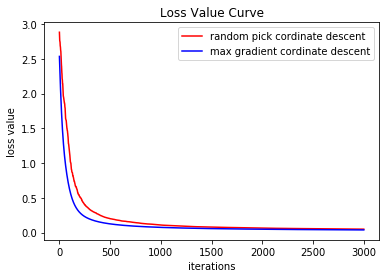

In [7]:
plt.plot(range(len(random_loss)),random_loss,'r')
plt.plot(range(len(innovation_loss)),innovation_loss,'b')
plt.legend(['random pick cordinate descent', 'max gradient cordinate descent'])
plt.xlabel("iterations")
plt.ylabel("loss value")
plt.title("Loss Value Curve")
plt.show()

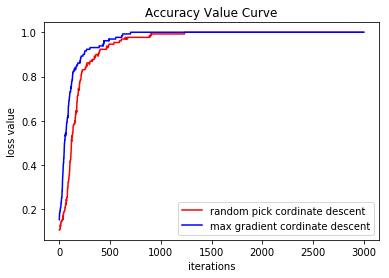

In [8]:
plt.plot(range(len(random_accuracy)),random_accuracy,'r')
plt.plot(range(len(innovation_accuracy)),innovation_accuracy,'b')
plt.legend(['random pick cordinate descent', 'max gradient cordinate descent'])
plt.xlabel("iterations")
plt.ylabel("loss value")
plt.title("Accuracy Value Curve")
plt.show()

In [9]:
innovation_loss[-1]

0.037755814056678196

In [10]:
random_loss[-1]

0.04854076003113076